In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import calendar

In [2]:
## 1. Շաբաթվա ո՞ր օրերին է Coffee-ի ամենաշատ վաճառքը լինում 
## Answer: on Saturday

## 2. Ստուգել՝ կա՞ արդյոք կորելացիա Tea և Jam ապրանքների միջև
## Answer: Yes, there is 100% correlation between them, which means that they are highly dependent on one other

## 3. Ո՞րն է ամենաշատ վաճառվող ապրանքը ցանկում։
## Answer: Coffee

In [3]:
data = pd.read_excel("DA_task.xlsx")

In [4]:
data.head()

,Item,date_time,period_day,weekday_weekend
0,Bread,2016-10-30 09:58:00,morning,weekend
1,Scandinavian,2016-10-30 10:05:00,morning,weekend
2,Scandinavian,2016-10-30 10:05:00,morning,weekend
3,Hot chocolate,2016-10-30 10:07:00,morning,weekend
4,Jam,2016-10-30 10:07:00,morning,weekend


In [5]:
data.shape

(20507, 4)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20507 entries, 0 to 20506
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Item             20507 non-null  object        
 1   date_time        20507 non-null  datetime64[ns]
 2   period_day       20507 non-null  object        
 3   weekday_weekend  20507 non-null  object        
dtypes: datetime64[ns](1), object(3)
memory usage: 641.0+ KB


In [7]:
data.describe()

<ipython-input-7-2bb0b18689d4>:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  data.describe()


,Item,date_time,period_day,weekday_weekend
count,20507,20507,20507,20507
unique,94,9182,4,2
top,Coffee,2017-02-05 11:58:00,afternoon,weekday
freq,5471,12,11569,12807
first,NaN,2016-10-30 09:58:00,NaN,NaN
last,NaN,2017-04-09 15:04:00,NaN,NaN


In [8]:
#insights

#there are not null values in the dataframe which is good and implies that the data is clean
#there are 9182 unique dates and times, which means that some orders contain more than one item.
#there are 94 types of items bought during 4 periods of the day
#coffee is the most ordered item

In [9]:
data.weekday_weekend.value_counts()

weekday    12807
weekend     7700
Name: weekday_weekend, dtype: int64

In [10]:
data.period_day.value_counts()

afternoon    11569
morning       8404
evening        520
night           14
Name: period_day, dtype: int64

In [11]:
np.unique(data["Item"])

array(['Adjustment', 'Afternoon with the baker', 'Alfajores',
       'Argentina Night', 'Art Tray', 'Bacon', 'Baguette', 'Bakewell',
       'Bare Popcorn', 'Basket', 'Bowl Nic Pitt', 'Bread',
       'Bread Pudding', 'Brioche and salami', 'Brownie', 'Cake',
       'Caramel bites', 'Cherry me Dried fruit', 'Chicken Stew',
       'Chicken sand', 'Chimichurri Oil', 'Chocolates',
       'Christmas common', 'Coffee', 'Coffee granules', 'Coke', 'Cookies',
       'Crepes', 'Crisps', 'Drinking chocolate spoons', 'Duck egg',
       'Dulce de Leche', 'Eggs', "Ella's Kitchen Pouches", 'Empanadas',
       'Extra Salami or Feta', 'Fairy Doors', 'Farm House', 'Focaccia',
       'Frittata', 'Fudge', 'Gift voucher', 'Gingerbread syrup',
       'Granola', 'Hack the stack', 'Half slice Monster',
       'Hearty & Seasonal', 'Honey', 'Hot chocolate', 'Jam',
       'Jammie Dodgers', 'Juice', 'Keeping It Local', 'Kids biscuit',
       'Lemon and coconut', 'Medialuna', 'Mighty Protein',
       'Mineral water'

In [12]:
#checking number of duplicates, missing values and columns with a single value
print("Duplicates:", data.duplicated().sum())
print("Missing values:", data.isna().sum().sum())
print("Single valued columns:", data.columns[data.nunique()==1])

Duplicates: 1782
Missing values: 0
Single valued columns: Index([], dtype='object')


## 1. Շաբաթվա ո՞ր օրերին է Coffee-ի ամենաշատ վաճառքը լինում 


In [13]:
df = data[data["Item"].str.contains("Coffee")]
df

,Item,date_time,period_day,weekday_weekend
7,Coffee,2016-10-30 10:13:00,morning,weekend
15,Coffee,2016-10-30 10:19:00,morning,weekend
27,Coffee,2016-10-30 10:30:00,morning,weekend
33,Coffee,2016-10-30 10:31:00,morning,weekend
41,Coffee,2016-10-30 10:37:00,morning,weekend
...,...,...,...,...
20483,Coffee,2017-04-09 12:32:00,afternoon,weekend
20485,Coffee,2017-04-09 13:04:00,afternoon,weekend
20490,Coffee,2017-04-09 13:49:00,afternoon,weekend
20502,Coffee,2017-04-09 14:32:00,afternoon,weekend


In [14]:
df["weekday_weekend"].value_counts()

weekday    3546
weekend    1932
Name: weekday_weekend, dtype: int64

In [15]:
df["date_time"].dt.day_name()


7        Sunday
15       Sunday
27       Sunday
33       Sunday
41       Sunday
          ...  
20483    Sunday
20485    Sunday
20490    Sunday
20502    Sunday
20504    Sunday
Name: date_time, Length: 5478, dtype: object

In [16]:
df["week"] = df["date_time"].dt.day_name()

<ipython-input-16-cb28907466c6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["week"] = df["date_time"].dt.day_name()


In [31]:
display(df)

,Item,date_time,period_day,weekday_weekend,week
7,Coffee,2016-10-30 10:13:00,morning,weekend,Sunday
15,Coffee,2016-10-30 10:19:00,morning,weekend,Sunday
27,Coffee,2016-10-30 10:30:00,morning,weekend,Sunday
33,Coffee,2016-10-30 10:31:00,morning,weekend,Sunday
41,Coffee,2016-10-30 10:37:00,morning,weekend,Sunday
...,...,...,...,...,...
20483,Coffee,2017-04-09 12:32:00,afternoon,weekend,Sunday
20485,Coffee,2017-04-09 13:04:00,afternoon,weekend,Sunday
20490,Coffee,2017-04-09 13:49:00,afternoon,weekend,Sunday
20502,Coffee,2017-04-09 14:32:00,afternoon,weekend,Sunday


In [18]:
df.week.value_counts()

Saturday     1106
Friday        855
Sunday        826
Tuesday       710
Monday        683
Thursday      670
Wednesday     628
Name: week, dtype: int64

## Answer: on Saturday

## 2. Ստուգել՝ կա՞ արդյոք կորելացիա Tea և Jam ապրանքների միջև

In [19]:
data["week"] = data["date_time"].dt.day_name()
data.drop("date_time", axis = 1)

,Item,period_day,weekday_weekend,week
0,Bread,morning,weekend,Sunday
1,Scandinavian,morning,weekend,Sunday
2,Scandinavian,morning,weekend,Sunday
3,Hot chocolate,morning,weekend,Sunday
4,Jam,morning,weekend,Sunday
...,...,...,...,...
20502,Coffee,afternoon,weekend,Sunday
20503,Tea,afternoon,weekend,Sunday
20504,Coffee,afternoon,weekend,Sunday
20505,Pastry,afternoon,weekend,Sunday


In [20]:
data_tea = data[data["Item"].str.contains("Tea")]
data_jam = data[data["Item"].str.contains("Jam")]
print(data_tea.Item.value_counts())
print(data_jam.Item.value_counts())

Tea    1435
Name: Item, dtype: int64
Jam               149
Jammie Dodgers    125
Name: Item, dtype: int64


In [21]:
data_jam = data_jam[~data_jam["Item"].str.contains("Jammie Dodgers")]
data_jam.Item.value_counts()

Jam    149
Name: Item, dtype: int64

In [22]:
df_corr = [data_tea, data_jam]
  
result = pd.concat(df_corr)
display(result)

,Item,date_time,period_day,weekday_weekend,week
16,Tea,2016-10-30 10:19:00,morning,weekend,Sunday
30,Tea,2016-10-30 10:30:00,morning,weekend,Sunday
72,Tea,2016-10-30 11:33:00,morning,weekend,Sunday
77,Tea,2016-10-30 11:42:00,morning,weekend,Sunday
85,Tea,2016-10-30 11:57:00,morning,weekend,Sunday
...,...,...,...,...,...
18342,Jam,2017-03-24 14:46:00,afternoon,weekday,Friday
18622,Jam,2017-03-26 09:13:00,morning,weekend,Sunday
18646,Jam,2017-03-26 10:38:00,morning,weekend,Sunday
19879,Jam,2017-04-05 08:37:00,morning,weekday,Wednesday


In [24]:
result = result.drop("date_time", axis = 1)

In [25]:
result

,Item,period_day,weekday_weekend,week
16,Tea,morning,weekend,Sunday
30,Tea,morning,weekend,Sunday
72,Tea,morning,weekend,Sunday
77,Tea,morning,weekend,Sunday
85,Tea,morning,weekend,Sunday
...,...,...,...,...
18342,Jam,afternoon,weekday,Friday
18622,Jam,morning,weekend,Sunday
18646,Jam,morning,weekend,Sunday
19879,Jam,morning,weekday,Wednesday


In [26]:
result.describe()

,Item,period_day,weekday_weekend,week
count,1584,1584,1584,1584
unique,2,3,2,7
top,Tea,afternoon,weekday,Saturday
freq,1435,991,1062,327


In [27]:
data_dummy = pd.get_dummies(result, drop_first=False)
data_dummy

,Item_Jam,Item_Tea,period_day_afternoon,period_day_evening,period_day_morning,weekday_weekend_weekday,weekday_weekend_weekend,week_Friday,week_Monday,week_Saturday,week_Sunday,week_Thursday,week_Tuesday,week_Wednesday
16,0,1,0,0,1,0,1,0,0,0,1,0,0,0
30,0,1,0,0,1,0,1,0,0,0,1,0,0,0
72,0,1,0,0,1,0,1,0,0,0,1,0,0,0
77,0,1,0,0,1,0,1,0,0,0,1,0,0,0
85,0,1,0,0,1,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18342,1,0,1,0,0,1,0,1,0,0,0,0,0,0
18622,1,0,0,0,1,0,1,0,0,0,1,0,0,0
18646,1,0,0,0,1,0,1,0,0,0,1,0,0,0
19879,1,0,0,0,1,1,0,0,0,0,0,0,0,1


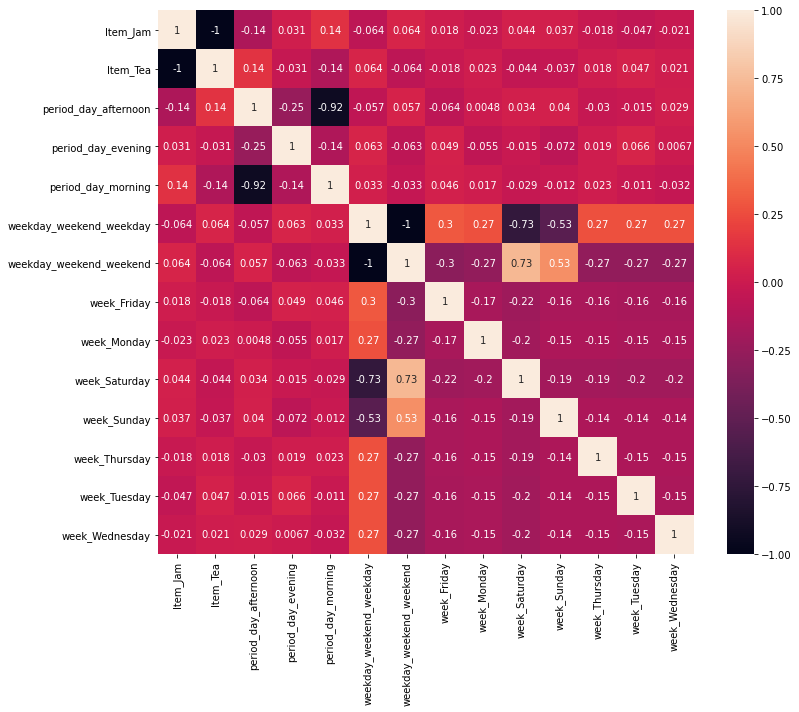

In [34]:
plt.figure(figsize=(12,10))
sns.heatmap(data_dummy.corr(), annot = True)
plt.show()

## Answer: Yes, there is 100% correlation between them, which means that they are highly dependent on one other

## 3. Ո՞րն է ամենաշատ վաճառվող ապրանքը ցանկում։

In [58]:
data.Item.value_counts().head(1)

Coffee    5471
Name: Item, dtype: int64

## Answer: Coffee


In [30]:
print("coffee")

coffee
